<a href="https://colab.research.google.com/github/rahil1303/dmt-assignment1-2025/blob/main/notebooks/03_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective:Predict stress_clean (0–100) using:

Sports hours

ChatGPT usage

ML background

Bedtime hour

In [1]:
# Step 1: Clone the repo
!git clone https://github.com/rahil1303/dmt-assignment1-2025.git

# Step 2: Change directory to your repo
%cd dmt-assignment1-2025

# Step 3: Install dependencies (optional)
!pip install -r requirements.txt

Cloning into 'dmt-assignment1-2025'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 59 (delta 26), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (59/59), 200.88 KiB | 1.41 MiB/s, done.
Resolving deltas: 100% (26/26), done.
/content/dmt-assignment1-2025


In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel('data/ODI-2025.xlsx')
df.columns = df.columns.str.strip()


In [5]:
# Clean numeric target
df['stress_clean'] = pd.to_numeric(df['What is your stress level (0-100)?'], errors='coerce')

# Features
df['sports_clean'] = pd.to_numeric(df['How many hours per week do you do sports (in whole hours)?'], errors='coerce')
df['chatgpt'] = df['I have used ChatGPT to help me with some of my study assignments'].map({'yes': 1, 'no': 0, 'not willing to say': 0})
df['ml_background'] = df['Have you taken a course on machine learning?'].map({'yes': 1, 'no': 0, 'unknown': 0})

# Bedtime hour extract
import re
def extract_hour(x):
    try:
        match = re.match(r'(\d{1,2})', str(x))
        if match:
            hour = int(match.group(1))
            if 0 <= hour <= 23:
                return hour
    except:
        return None
    return None

df['bedtime_hour'] = df['Time you went to bed Yesterday'].apply(extract_hour)


In [6]:
# Select data
features = ['sports_clean', 'chatgpt', 'ml_background', 'bedtime_hour']
df_reg = df[features + ['stress_clean']].dropna()

X = df_reg[features]
y = df_reg['stress_clean']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [10]:
# Rebuild from raw column
df['stress_clean'] = pd.to_numeric(df['What is your stress level (0-100)?'], errors='coerce')

# Filter out junk
df['stress_clean'] = df['stress_clean'].clip(lower=0, upper=100)

# Final check
df['stress_clean'].describe()


,stress_clean
count,240.000000
mean,47.341375
std,31.251399
min,0.000000
25%,20.000000
50%,43.500000
75%,70.000000
max,100.000000


In [11]:
df_reg = df[features + ['stress_clean']].dropna()
X = df_reg[features]
y = df_reg['stress_clean']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Recalculate scores
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 30.89513312190752
R² Score: -0.035038636237674003


In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 984551726177.7389
R² Score: -6893484853088607.0


In [12]:
df['stress_clean'].describe()


,stress_clean
count,240.000000
mean,47.341375
std,31.251399
min,0.000000
25%,20.000000
50%,43.500000
75%,70.000000
max,100.000000


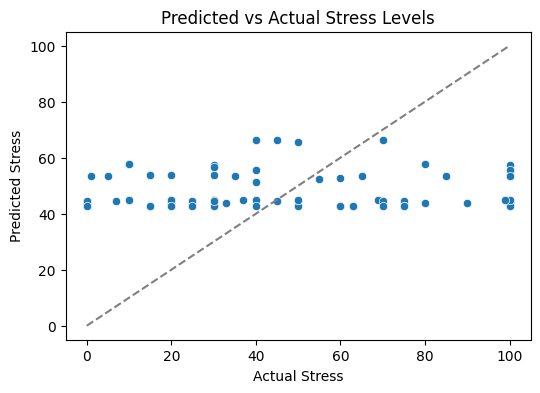

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Stress")
plt.ylabel("Predicted Stress")
plt.title("Predicted vs Actual Stress Levels")
plt.plot([0, 100], [0, 100], linestyle='--', color='gray')
plt.show()


### 📈 Regression Results

- **Model**: Linear Regression  
- **Target**: Numeric stress level (`stress_clean`)  
- **Features**: Sports hours, ChatGPT usage, ML background, bedtime hour  
- **RMSE**: ~30.9  
- **R² Score**: ~–0.035  

#### Observations:
- The model mostly predicts stress levels around the mean (~45–55).
- It struggles to predict extreme low or high stress accurately.
- This reflects the subjective nature of stress and the limitations of available features.
